<a href="https://colab.research.google.com/github/flaviasmarques/datapython/blob/master/R4_AnaliseExploratoria_Covid_e_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhar com os dados do COVID Mundo

Parte 1 - Limpeza e analise dos Dataset extraidos no site: https://ourworldindata.org/coronavirus-source-data

In [2]:
# Importando as bibliotecas:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 
# Biblioteca para trabalhar com mapas:
#!pip install folium

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
#Subir do Dataframe para o Python - Deve escolher o doc.
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [3]:
# dataframe covid_mund ver os dados  
!head owid-covid-data.csv

iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,38928341.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,64.83
AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,,597.029,9.59,,,37.746,0.5,6

In [4]:
# Carregando a base de dados e inserir o nome dataset no Dataframe:
dataset = pd.read_csv("owid-covid-data.csv",sep=',', parse_dates=['date'],  low_memory=False)    
#parse_dates=['Date'])        #, low_memory=False

In [5]:
#para identificar o tipo
type(dataset)

pandas.core.frame.DataFrame

In [6]:
#Para ver se o PANDA identificou os dados no momento da leitura do dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30221 entries, 0 to 30220
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         30157 non-null  object        
 1   continent                        29960 non-null  object        
 2   location                         30221 non-null  object        
 3   date                             30221 non-null  datetime64[ns]
 4   total_cases                      29910 non-null  float64       
 5   new_cases                        29910 non-null  float64       
 6   total_deaths                     29910 non-null  float64       
 7   new_deaths                       29910 non-null  float64       
 8   total_cases_per_million          29846 non-null  float64       
 9   new_cases_per_million            29846 non-null  float64       
 10  total_deaths_per_million         29846 non-null  float64  

In [7]:
#Ver o dataframe como tabela
dataset.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,2.991000e+04,29910.000000,29910.000000,29910.000000,29846.000000,29846.000000,29846.000000,29846.000000,9.243000e+03,8844.000000,9243.000000,8844.000000,10041.000000,10041.000000,24555.000000,3.015700e+04,28880.000000,27238.000000,26848.000000,27098.000000,26918.000000,18010.000000,27261.000000,28164.000000,21731.000000,21475.000000,12384.000000,24847.000000,29800.000000
mean,4.124658e+04,874.571581,2314.651521,38.292344,947.158421,16.511254,36.870654,0.523617,6.433078e+05,15527.596789,25.719837,0.555073,14437.308834,0.514701,58.317872,9.665445e+07,369.986810,31.735715,9.511906,6.033658,21751.639016,11.266963,248.946896,8.037511,11.043274,32.642063,53.562038,3.159206,74.316933
std,4.154619e+05,7892.178629,22264.633831,336.953295,2380.018119,62.450523,118.091150,2.972912,2.505799e+06,53808.953268,42.975341,0.976099,48687.468603,0.834861,30.581975,6.456298e+08,1692.397474,9.003069,6.394214,4.378269,20785.543320,18.554938,118.179163,4.104922,10.517044,13.322222,31.381427,2.559322,7.293745
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,0.000000,-0.212000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.800000e+01,0.000000,0.000000,0.000000,5.808000,0.000000,0.000000,0.000000,2.249100e+04,824.000000,1.289000,0.053000,914.000000,0.055000,37.960000,1.886202e+06,39.497000,24.900000,3.655000,2.171000,6171.884000,0.500000,152.783000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.320000e+02,5.000000,7.000000,0.000000,113.970500,0.627000,1.449000,0.000000,9.734000e+04,2767.500000,7.152000,0.229000,3041.000000,0.237000,68.520000,8.947027e+06,90.672000,31.900000,7.150000,4.458000,15308.712000,1.700000,235.954000,7.110000,6.900000,31.400000,59.550000,2.540000,75.870000
75%,3.857250e+03,84.000000,85.000000,2.000000,723.801250,9.392750,16.604000,0.117000,3.763960e+05,9121.500000,33.110500,0.688000,9047.000000,0.661000,82.410000,3.236600e+07,222.873000,40.100000,14.864000,9.732000,33132.320000,14.800000,317.840000,10.080000,19.600000,40.900000,83.741000,4.210000,80.180000
max,1.307922e+07,230051.000000,572662.000000,10489.000000,36103.379000,4944.376000,1237.551000,200.040000,4.028218e+07,823375.000000,449.588000,18.630000,666622.000000,13.379000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [8]:
# Visualizando as 5 primeiras linhas do Dataframe:
dataset.head().T

,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00
total_cases,0,0,0,0,0
new_cases,0,0,0,0,0
total_deaths,0,0,0,0,0
new_deaths,0,0,0,0,0
total_cases_per_million,0,0,0,0,0
new_cases_per_million,0,0,0,0,0


In [9]:
#Analisando por localização e total de casos
dataset.groupby('location')['total_cases'].count()

location
Afghanistan       187
Albania           128
Algeria           192
Andorra           123
Angola            115
                 ... 
Western Sahara     80
World             197
Yemen              96
Zambia            118
Zimbabwe          116
Name: total_cases, Length: 212, dtype: int64

In [10]:
# usar group by para total de cases(casos) - Analise Quantitativa
#Amostragem por continent
dataset.groupby('location')['total_cases'].sum()

location
Afghanistan         1438590.0
Albania              137265.0
Algeria              842666.0
Andorra               82069.0
Angola                11917.0
                     ...     
Western Sahara         8764.0
World             617020127.0
Yemen                 44548.0
Zambia                83946.0
Zimbabwe              25191.0
Name: total_cases, Length: 212, dtype: float64

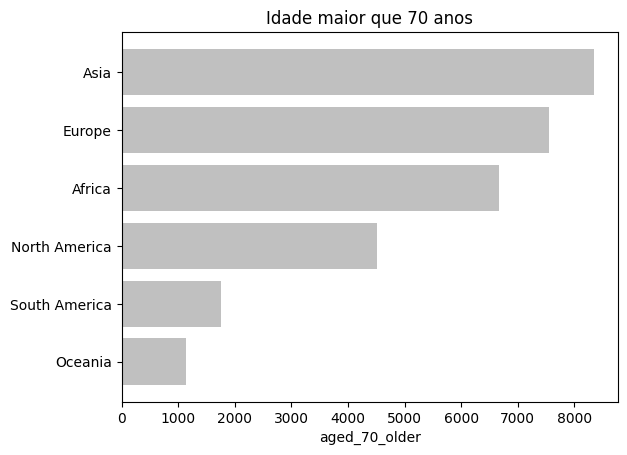

In [11]:
#Vamos plotar um gráfico para os casos de pessoas contaninadas por continente com mais de 17 anos de idade
plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['continent'].value_counts()))
values = dataset['continent'].value_counts()
segmentos = dataset['continent'].unique()

ax.barh(y_pos, values, align='center', color='Silver') #silver(prata)  grey(cinza)
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('aged_70_older')
ax.set_title('Idade maior que 70 anos')

plt.show()

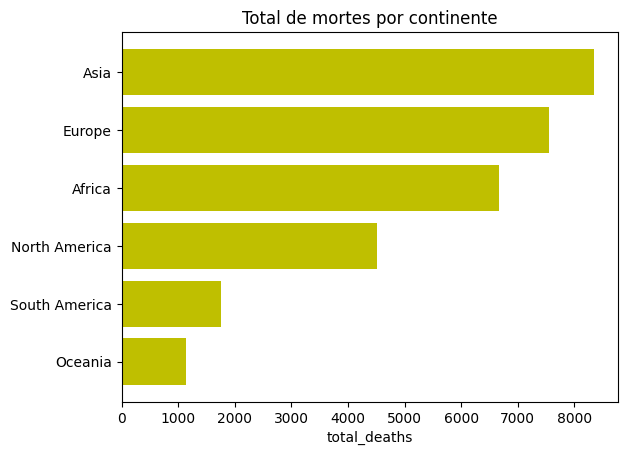

In [12]:
#Vamos plotar um gráfico para os casos de pessoas contaninadas por continente com mais de 17 anos de idade
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['continent'].value_counts()[:20]))
values = dataset['continent'].value_counts()[:20]
segmentos = dataset['continent'].unique()[:20]

ax.barh(y_pos, values, align='center', color='y') 
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('total_deaths')
ax.set_title('Total de mortes por continente')

plt.show()

In [13]:
#Criando o novo dataframe dataset2 e vendo as 10 primeiras linhas do arquivo e usando paramentro de data \ para acertar o tipo date
df = pd.read_csv("owid-covid-data.csv", sep=',', parse_dates=['date'], low_memory=False)  

In [14]:
#Gráfico para medir o grau de correlação entre as variáveis com Total dos cases(casos). 
#Onde 1 indica uma correlação perfeitamente positiva e -1 uma correlação perfeitamente negativa e 0 indica que não existe uma correlação entre essas variáveis.
df = dataset.drop('total_cases',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
new_cases,1.000000,0.948623,0.869529,0.053879,0.068184,0.054540,0.049858,0.763353,0.847604,0.051674,0.072733,0.838076,0.078122,0.103665,0.671658,-0.017690,0.015127,0.009293,0.006544,0.005839,-0.029016,-0.028288,0.019815,-0.013188,-0.009741,0.025467,-0.018155,0.001454
total_deaths,0.948623,1.000000,0.796841,0.065250,0.032257,0.131625,0.045009,0.809656,0.814578,0.126028,0.099572,0.809105,0.114763,0.068853,0.625335,-0.017272,0.038859,0.043241,0.042761,0.021120,-0.033652,-0.050214,0.003742,0.013199,-0.013488,0.022911,-0.009902,0.023487
new_deaths,0.869529,0.796841,1.000000,0.035196,0.047298,0.069843,0.103051,0.421245,0.556775,-0.009659,0.026857,0.539517,0.027274,0.099851,0.685016,-0.019157,0.029358,0.030393,0.028928,0.011745,-0.034842,-0.047365,0.010437,0.001056,-0.018038,0.029662,-0.017999,0.015782
total_cases_per_million,0.053879,0.065250,0.035196,1.000000,0.433457,0.590641,0.166252,0.207694,0.178276,0.558946,0.401980,0.176195,0.458037,0.102753,-0.032956,0.069247,0.174309,0.093105,0.096574,0.386104,-0.195047,-0.197089,0.056078,0.115942,-0.050308,0.204017,0.034620,0.255040
new_cases_per_million,0.068184,0.032257,0.047298,0.433457,1.000000,0.158411,0.202641,0.112155,0.123090,0.269470,0.289693,0.113543,0.325073,0.167041,-0.018049,0.032700,0.087152,-0.007473,-0.005492,0.273649,-0.134483,-0.124080,0.094103,0.020290,-0.036629,0.161734,-0.011392,0.125076
total_deaths_per_million,0.054540,0.131625,0.069843,0.590641,0.158411,1.000000,0.257299,0.307685,0.270749,0.277598,0.182935,0.254456,0.193592,0.065768,-0.016584,0.018844,0.269330,0.311074,0.322947,0.253231,-0.162863,-0.257314,-0.095564,0.289473,-0.080563,0.187279,0.068661,0.271738
new_deaths_per_million,0.049858,0.045009,0.103051,0.166252,0.202641,0.257299,1.000000,0.097171,0.144818,0.003323,0.058969,0.123817,0.055607,0.112275,-0.006540,0.002606,0.170790,0.190235,0.197192,0.120631,-0.134857,-0.170285,-0.044859,0.177578,-0.064463,0.150129,0.024229,0.124755
total_tests,0.763353,0.809656,0.421245,0.207694,0.112155,0.307685,0.097171,1.000000,0.948250,0.214592,0.174078,0.959631,0.188836,0.033071,0.280493,-0.042368,0.083221,0.076907,0.076108,0.107304,-0.072395,0.020376,0.075681,0.081434,0.027503,0.030543,0.032308,0.030071
new_tests,0.847604,0.814578,0.556775,0.178276,0.123090,0.270749,0.144818,0.948250,1.000000,0.153403,0.178105,0.991701,0.175768,0.068025,0.374343,-0.057325,0.068917,0.056970,0.054386,0.112790,-0.066991,0.041902,0.103611,0.070929,0.032591,0.019226,0.015264,0.008573
total_tests_per_thousand,0.051674,0.126028,-0.009659,0.558946,0.269470,0.277598,0.003323,0.214592,0.153403,1.000000,0.748927,0.156711,0.823358,-0.117380,-0.121364,0.174053,0.259960,0.190846,0.191830,0.458845,-0.241638,-0.156712,0.072874,0.200278,-0.025479,0.326223,0.075847,0.307922


In [15]:
# Criar u, novo dataset para realizar a limpeza nas colunas
dataset1 = pd.read_csv("owid-covid-data.csv",sep=',', parse_dates=['date'],  low_memory=False)  

In [16]:
# Visualizando as colunas para verificar as que serão realizadas limpezas
list(dataset1)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cvd_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [17]:
#Limpeza de dados com drop das colunas que não serão utilizadas
df.drop('new_cases', inplace=True, axis=1)  
dataset1.drop('new_deaths', inplace=True, axis=1)  
dataset1.drop('total_cases_per_million', inplace=True, axis=1)  
dataset1.drop('new_cases_per_million', inplace=True, axis=1)
dataset1.drop('total_deaths_per_million', inplace=True, axis=1)
dataset1.drop('new_deaths_per_million', inplace=True, axis=1) 
dataset1.drop('new_tests', inplace=True, axis=1)  
dataset1.drop('total_tests_per_thousand', inplace=True, axis=1)  
dataset1.drop('new_tests_per_thousand', inplace=True, axis=1)  
dataset1.drop('new_tests_smoothed', inplace=True, axis=1)
dataset1.drop('new_tests_smoothed_per_thousand', inplace=True, axis=1)
dataset1.drop('tests_units', inplace=True, axis=1) 
dataset1.drop('stringency_index', inplace=True, axis=1)
dataset1.drop('population_density', inplace=True, axis=1) 
dataset1.drop('gdp_per_capita', inplace=True, axis=1)  
dataset1.drop('extreme_poverty', inplace=True, axis=1)  
dataset1.drop('cvd_death_rate', inplace=True, axis=1)  
dataset1.drop('handwashing_facilities', inplace=True, axis=1)
dataset1.drop('hospital_beds_per_thousand', inplace=True, axis=1)
dataset1.drop('life_expectancy', inplace=True, axis=1) 


In [18]:
# Visualizando se excluiu as colunas e ver as colunas que ficaram
list(dataset1)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'total_tests',
 'population',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers']

In [ ]:
#Como transformar em zeros dados is null 

# Preenchendo missing values 
#dataset1[['continent','location']] = dataset1[['continent','location']].fillna('')
#dataset1[['total_cases', 'new_cases', 'total_deaths', 'total_tests', 'population','median_age','aged_65_older','aged_70_older']] = df2[['total_cases', 'new_cases', 'total_deaths', 'total_tests', 'population','median_age','aged_65_older','aged_70_older']].fillna(0)

In [23]:
#Renomear as colunas
dataset1.rename(columns={ 'continent':'Continente','location':'Pais','date':'Data','total_cases':'Total_Casos','new_cases':'Novos_Casos','total_deaths':'Total_Mortes','total_tests':'Total_Testes','population':'População','median_age':'Menor_65_anos','aged_65_older':'Maior_65_anos','aged_70_older':'Maior_70_anos'},inplace = True)

In [21]:
dataset1.describe()

,Total_Casos,Novos_Casos,Total_Mortes,Total_Testes,População,Menor_65_anos,Maior_65_anos,Maior_70_anos,diabetes_prevalence,female_smokers,male_smokers
count,2.991000e+04,29910.000000,29910.000000,9.243000e+03,3.015700e+04,27238.000000,26848.000000,27098.000000,28164.000000,21731.000000,21475.000000
mean,4.124658e+04,874.571581,2314.651521,6.433078e+05,9.665445e+07,31.735715,9.511906,6.033658,8.037511,11.043274,32.642063
std,4.154619e+05,7892.178629,22264.633831,2.505799e+06,6.456298e+08,9.003069,6.394214,4.378269,4.104922,10.517044,13.322222
min,0.000000e+00,-29726.000000,0.000000,1.000000e+00,8.090000e+02,15.100000,1.144000,0.526000,0.990000,0.100000,7.700000
25%,1.800000e+01,0.000000,0.000000,2.249100e+04,1.886202e+06,24.900000,3.655000,2.171000,5.310000,1.900000,21.400000
50%,3.320000e+02,5.000000,7.000000,9.734000e+04,8.947027e+06,31.900000,7.150000,4.458000,7.110000,6.900000,31.400000
75%,3.857250e+03,84.000000,85.000000,3.763960e+05,3.236600e+07,40.100000,14.864000,9.732000,10.080000,19.600000,40.900000
max,1.307922e+07,230051.000000,572662.000000,4.028218e+07,7.794799e+09,48.200000,27.049000,18.493000,23.360000,44.000000,78.100000


In [37]:
#AGORA SIM o Gráfico para medir o grau de correlação entre as variáveis com Total dos cases(casos). 
#Onde 1 indica uma correlação perfeitamente positiva e -1 uma correlação perfeitamente negativa e 0 indica que não existe uma correlação entre essas variáveis.
df = dataset1.drop('Total_Casos',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Novos_Casos,Total_Mortes,Total_Testes,População,Menor_65_anos,Maior_65_anos,Maior_70_anos,diabetes_prevalence,female_smokers,male_smokers
Novos_Casos,1.000000,0.948623,0.763353,0.671658,0.015127,0.009293,0.006544,0.019815,-0.013188,-0.009741
Total_Mortes,0.948623,1.000000,0.809656,0.625335,0.038859,0.043241,0.042761,0.003742,0.013199,-0.013488
Total_Testes,0.763353,0.809656,1.000000,0.280493,0.083221,0.076907,0.076108,0.075681,0.081434,0.027503
População,0.671658,0.625335,0.280493,1.000000,-0.004335,-0.017393,-0.022849,0.019140,-0.076867,0.023816
Menor_65_anos,0.015127,0.038859,0.083221,-0.004335,1.000000,0.910357,0.896081,0.119110,0.681796,0.179786
Maior_65_anos,0.009293,0.043241,0.076907,-0.017393,0.910357,1.000000,0.994227,-0.111615,0.776819,0.074377
Maior_70_anos,0.006544,0.042761,0.076108,-0.022849,0.896081,0.994227,1.000000,-0.142883,0.781420,0.076249
diabetes_prevalence,0.019815,0.003742,0.075681,0.019140,0.119110,-0.111615,-0.142883,1.000000,-0.132856,0.159747
female_smokers,-0.013188,0.013199,0.081434,-0.076867,0.681796,0.776819,0.781420,-0.132856,1.000000,0.160426
male_smokers,-0.009741,-0.013488,0.027503,0.023816,0.179786,0.074377,0.076249,0.159747,0.160426,1.000000


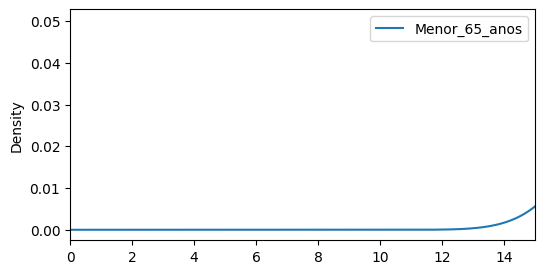

In [38]:
#Avaliando o quantitativo de casos com mais de 65 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Menor_65_anos',xlim=[0,15],figsize=[6,3])

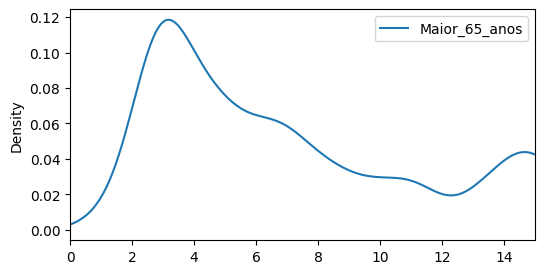

In [39]:
#Avaliando o quantitativo de casos com mais de 65 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Maior_65_anos',xlim=[0,15],figsize=[6,3])

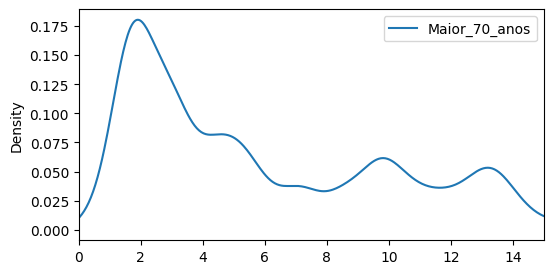

In [40]:
#Avaliando o quantitativo de casos com mais de 70 anos das pessoas que foram contabinadas
dataset1.plot.density(y='Maior_70_anos',xlim=[0,15],figsize=[6,3])

In [41]:
#Criando uma variavel X para filtrar os dados que tem zero no dataframe por total de casos filtrando por continente
x = dataset1.groupby('Continente')['Continente'].count()

x = x[x > 20]

df = dataset1[dataset1['Continente'].isin(x.keys())]
df = df[df['Total_Casos']==0]
x1 = df.groupby('Continente')['Continente'].count()
x1

Continente
Africa            162
Asia             1106
Europe           1336
North America     169
Oceania            84
South America     118
Name: Continente, dtype: int64

In [42]:
#Criando uma variavel X para filtrar no dataframe por total de casos filtando por continente
x = dataset1.groupby('Continente')['Continente'].count()

x = x[x > 20]

df = dataset1[dataset1['Continente'].isin(x.keys())]
df = df[df['Total_Casos']>1]
x1 = df.groupby('Continente')['Continente'].count()
x1

Continente
Africa           6256
Asia             6175
Europe           6769
North America    4276
Oceania           967
South America    1606
Name: Continente, dtype: int64

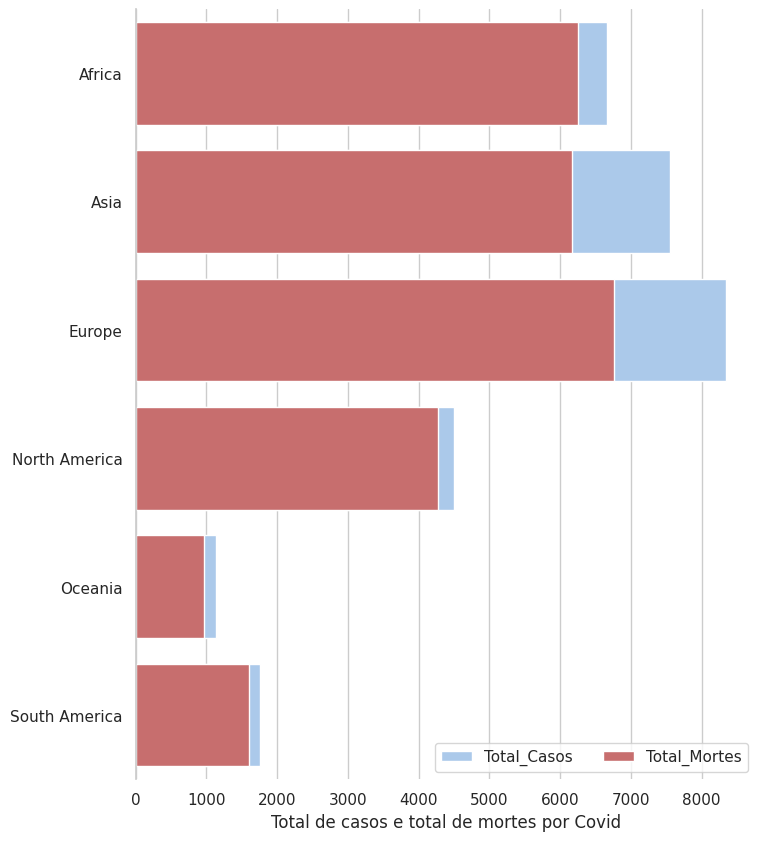

In [ ]:
# Plotar Gráfico de total de deaths(mortes) no Dataframe:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total_Casos", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Total_Mortes", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Total de casos e total de mortes por Covid")
sns.despine(left=False, bottom=True)

In [43]:
#Analisar os dados da coluna continent(continente)
dataset1['Continente'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [44]:
#Fazer um group by por continent(continente)
dataset1.groupby('Continente')['Continente'].count()

Continente
Africa           6661
Asia             7556
Europe           8348
North America    4507
Oceania          1133
South America    1755
Name: Continente, dtype: int64

In [45]:
#Filtrar por location(pais) o quantitativo de linhas do pais Afghanistan 
dataset1[dataset1['Pais'] == 'Afghanistan']['Pais'].value_counts()

Afghanistan    187
Name: Pais, dtype: int64

In [46]:
#Filtrar por location(pais) o quantitativo de linhas do pais Brazil 
dataset1[dataset1['Pais'] == 'Brazil']['Pais'].value_counts()

Brazil    197
Name: Pais, dtype: int64

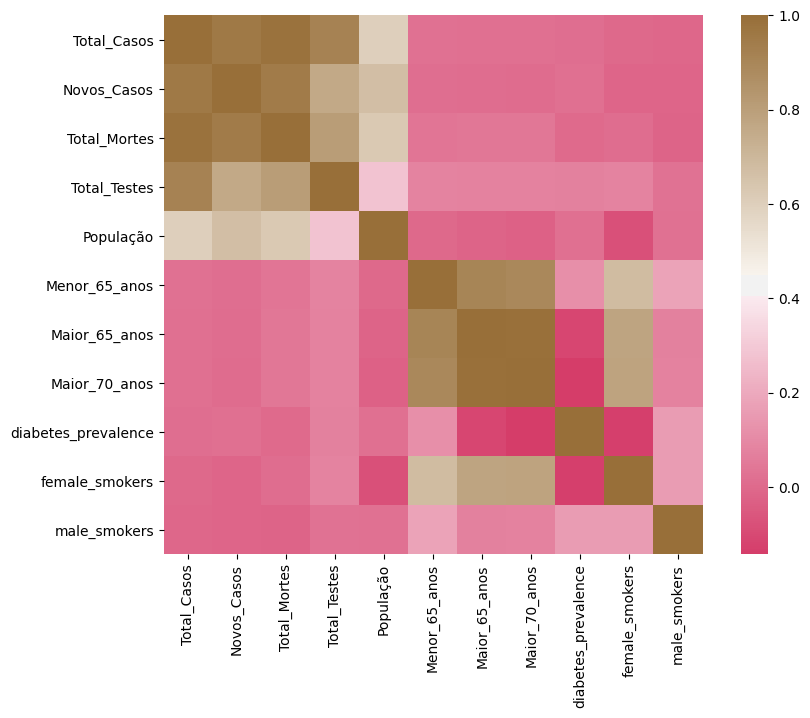

In [47]:
#Vamos visualizar a correlação entre as variáveis filtrando por total de cases com o gráfico abaixo:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 7))
#dataset1 = dataset1('total_cases',axis=1)
corr = dataset1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(0, 50, as_cmap=True), square=True, ax=ax)

In [48]:
#Criando lista de Continente - Parte 1
ContNomes1 = dataset1.Continente.drop_duplicates()
print(ContNomes1)

0                 Asia
187             Europe
315             Africa
745      North America
972      South America
1404           Oceania
29960              NaN
Name: Continente, dtype: object


In [49]:
#Criando lista de Continente - Final
ContNomes = list(ContNomes1)
print(ContNomes)

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania', nan]


In [50]:
Continentes = dataset1['Continente'].unique()
Continentes

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [ ]:
# Análise exploratória de atributos multidimensionais (mais de 1 atributo)
# Mas com análise de reta de regressão
# Cruzamento da idade por horas de estudo/aprendizagem (2 atributos)

# Cópia do dataset1 original e posterior tratamento de nulos NaN
df = dataset1.copy()
#df3 = df3.dropna(subset=["Continente"])
# Adicionando atributo de um recorte do df original
df3 = df3[df['Menor_65_anos'].isin(range(0,70))]

# OBS: só quero o cruzamento x x y e não na mesma métrica
# Portanto, não preciso do crosstab nesse caso
x = df3.Menor_65_anos
y = df3.Continente

# Construindo o gráfico com a reta de análise de regressão (polyfit)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Data")
plt.ylabel("Horas de estudo/treinamento/aprendizagem sssssss")
plt.title("Idade x Horas de estudo/treinamento/aprendizage mddddddd")
plt.show()

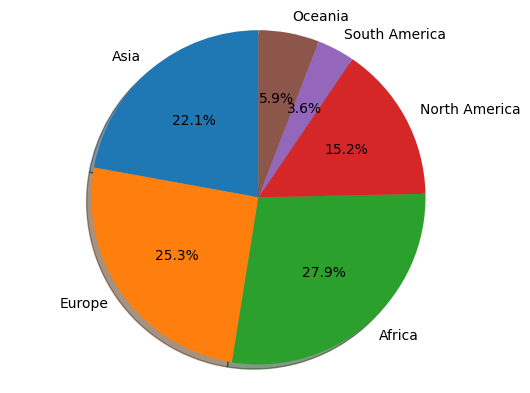

In [81]:
#import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'
sizes = [6566, 7508, 8262, 4498, 1076, 1739]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

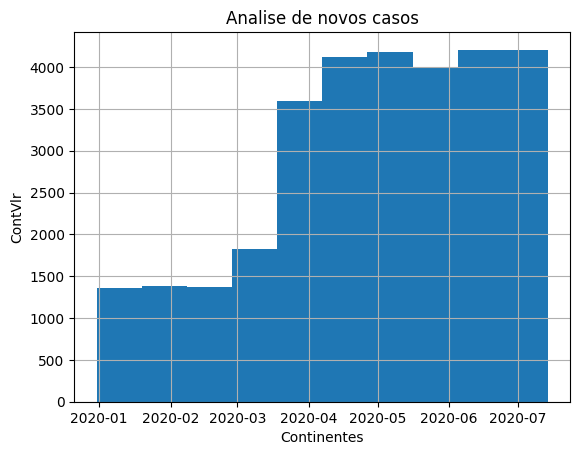

In [51]:
# Conclusão sumarizada analítica do histograma:
dataset1.Data.hist()
plt.xlabel("Continentes", colors = listaRGB)
plt.ylabel("ContVlr")
plt.title("Analise de novos casos")
plt.show()
#fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)#


In [52]:
#Criando os valores da lista de Total Casos x Continente - Parte 1
ContVlr1 = dataset1.groupby('Continente')['Total_Casos'].count()
ContVlr1

Continente
Africa           6566
Asia             7508
Europe           8262
North America    4498
Oceania          1076
South America    1739
Name: Total_Casos, dtype: int64

In [53]:
#Criando os valores da lista de Total Casos x Continente - Final
ContVlr = list(ContVlr1)
ContVlr

[6566, 7508, 8262, 4498, 1076, 1739]

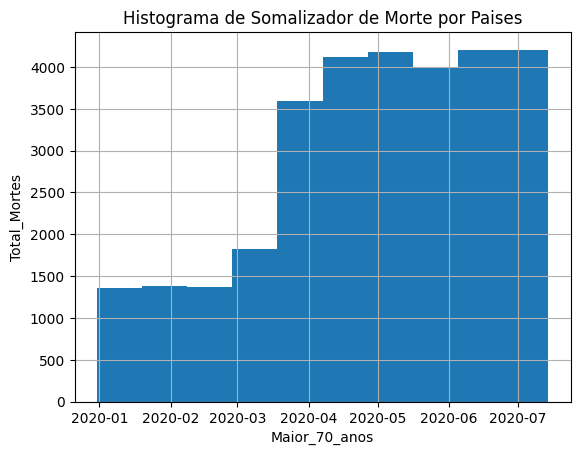

In [54]:
# Conclusão sumarizada analítica do histograma:
dataset1.Data.hist()
plt.xlabel("Maior_70_anos")
plt.ylabel("Total_Mortes")
plt.title("Histograma de Somalizador de Morte por Paises")
plt.show()

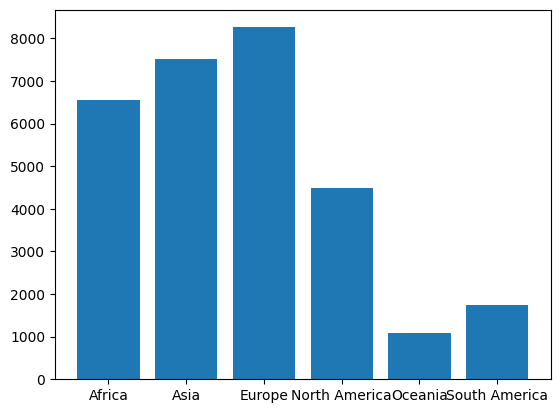

In [55]:
#Plotando gráfico de barras verticais o gráfico de colunas:
grupos = [ 'Africa','Asia','Europe','North America','Oceania', 'South America']
valores = [6566, 7508, 8262, 4498, 1076, 1739]
plt.bar(grupos, valores)
plt.show()

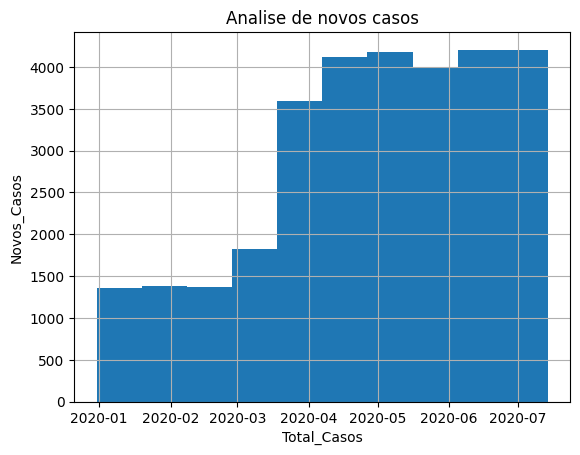

In [56]:
# Conclusão sumarizada analítica do histograma:
dataset1.Data.hist()
plt.xlabel("Total_Casos")
plt.ylabel("Novos_Casos")
plt.title("Analise de novos casos")
plt.show()




In [57]:
nomefatia = dataset1.groupby('Continente')['Total_Casos'].count() #dataset.groupby('continent')
print(nomefatia)

Continente
Africa           6566
Asia             7508
Europe           8262
North America    4498
Oceania          1076
South America    1739
Name: Total_Casos, dtype: int64


In [58]:
nomefatia.describe()

count       6.000000
mean     4941.500000
std      3021.470884
min      1076.000000
25%      2428.750000
50%      5532.000000
75%      7272.500000
max      8262.000000
Name: Total_Casos, dtype: float64

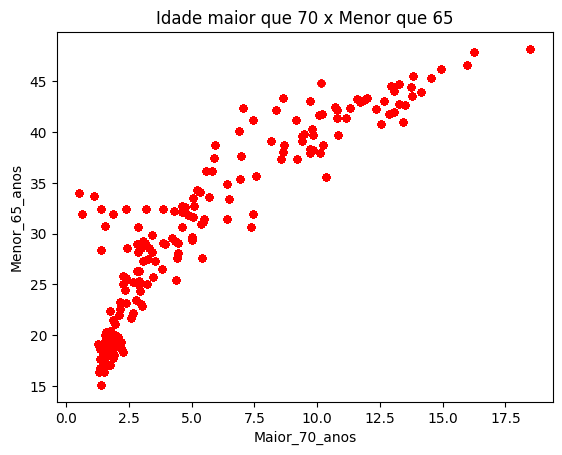

In [59]:

dataset1.plot(x='Maior_70_anos',y='Menor_65_anos',kind='scatter', title='Idade maior que 70 x Menor que 65',color='r')

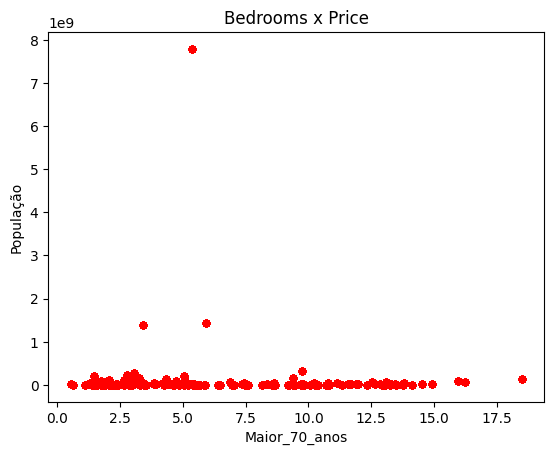

In [60]:
dataset1.plot(x='Maior_70_anos',y='População',kind='scatter', title='Bedrooms x Price',color='r')

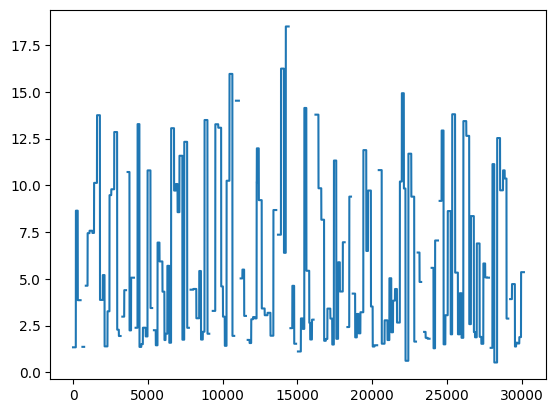

In [61]:
dataset1['Maior_70_anos'].plot()

In [63]:
# Total de continente por total de casos
dataset1.groupby('Continente')[u'Total_Casos'].count()

Continente
Africa           6566
Asia             7508
Europe           8262
North America    4498
Oceania          1076
South America    1739
Name: Total_Casos, dtype: int64

In [64]:
#Criar um novo dataframe com campos que tem linhas faltandos  
enulo = dataset1.isnull()

In [65]:
#Vendo as colunas que tem dados faltantes(is null)
enulo.describe()

,iso_code,Continente,Pais,Data,Total_Casos,Novos_Casos,Total_Mortes,Total_Testes,População,Menor_65_anos,Maior_65_anos,Maior_70_anos,diabetes_prevalence,female_smokers,male_smokers
count,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221,30221
unique,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
freq,30157,29960,30221,30221,29910,29910,29910,20978,30157,27238,26848,27098,28164,21731,21475


In [66]:
#Criar um novo dataframe para ver as linhas is null
faltantes = dataset1.isnull()
print(faltantes)

       iso_code  Continente  ...  female_smokers  male_smokers
0         False       False  ...            True          True
1         False       False  ...            True          True
2         False       False  ...            True          True
3         False       False  ...            True          True
4         False       False  ...            True          True
...         ...         ...  ...             ...           ...
30216      True        True  ...            True          True
30217      True        True  ...            True          True
30218      True        True  ...            True          True
30219      True        True  ...            True          True
30220      True        True  ...            True          True

[30221 rows x 15 columns]


In [67]:
#Ver o total de linhas com is null
faltantes = dataset1.isnull().sum()
print(faltantes)

iso_code                  64
Continente               261
Pais                       0
Data                       0
Total_Casos              311
Novos_Casos              311
Total_Mortes             311
Total_Testes           20978
População                 64
Menor_65_anos           2983
Maior_65_anos           3373
Maior_70_anos           3123
diabetes_prevalence     2057
female_smokers          8490
male_smokers            8746
dtype: int64


#trabalhando com COVID-19 mundo para plotar e mapa
### Dicionário de dados do Dataframe (Dataset2) - df2:
Province/State – Província ou Estado
Country/Region – País ou Região
Lat – Latitude
Long – Longitude
Date – Data
Comfirmed – Número de casos confirmados
Deaths – Número de mortes
Recovered – Número de recuperados

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Subir do Dataframe para o Python - Deve escolher o doc.
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv


In [ ]:
# Lendo o arquivo covid_19_clean_complete
!head covid_19_clean_complete.csv

Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
,Afghanistan,33.0,65.0,1/22/20,0,0,0
,Albania,41.1533,20.1683,1/22/20,0,0,0
,Algeria,28.0339,1.6596,1/22/20,0,0,0
,Andorra,42.5063,1.5218,1/22/20,0,0,0
,Angola,-11.2027,17.8739,1/22/20,0,0,0
,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0,0
,Argentina,-38.4161,-63.6167,1/22/20,0,0,0
,Armenia,40.0691,45.0382,1/22/20,0,0,0
Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0


In [ ]:
#Criando o novo dataframe dataset2 e vendo as 10 primeiras linhas do arquivo
df2 = pd.read_csv("covid_19_clean_complete.csv",sep=',', parse_dates=['Date'], low_memory=False)  
df2.head(10)

In [ ]:
#Para ver se o PANDA identificou os dados no momento da leitura do dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia_Estado         19836 non-null  object        
 1   Pais                     19836 non-null  object        
 2   Latitude                 19836 non-null  float64       
 3   Longitude                19836 non-null  float64       
 4   Data                     19836 non-null  datetime64[ns]
 5   Total_Casos_Confirmados  19836 non-null  int64         
 6   Total_Mortes             19836 non-null  int64         
 7   total_Casos_Recuperados  19836 non-null  int64         
 8   Ativo                    19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
#Renomear as colunas
df2.rename(columns={'Province/State':'Provincia_Estado','Country/Region':'Pais','Date':'Data','Lat':'Latitude','Long':'Longitude','Confirmed':'Total_Casos_Confirmados','Deaths':'Total_Mortes','Recovered':'total_Casos_Recuperados','Active':'Ativo'},inplace = True)

In [ ]:
#Visualizar a alteração do nome dos campos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia_Estado         19836 non-null  object        
 1   Pais                     19836 non-null  object        
 2   Latitude                 19836 non-null  float64       
 3   Longitude                19836 non-null  float64       
 4   Data                     19836 non-null  datetime64[ns]
 5   Total_Casos_Confirmados  19836 non-null  int64         
 6   Total_Mortes             19836 non-null  int64         
 7   total_Casos_Recuperados  19836 non-null  int64         
 8   Ativo                    19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Casos ativos = Casos Confirmados - Mortes - Casos Recoperados
df2['Ativo'] = df2['Total_Casos_Confirmados'] - df2['Total_Mortes'] - df2['total_Casos_Recuperados']


In [ ]:
# Subistituindo Mainland China por China
df2['Pais'] = df2['Pais'].replace('Mainland China', 'China')


In [ ]:
# Preenchendo missing values 
df2[['Provincia_Estado']] = df2[['Provincia_Estado']].fillna('')
df2[['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo']] = df2[['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo']].fillna(0)

In [ ]:
# Convertendo datatypes
df2['total_Casos_Recuperados'] = df2['total_Casos_Recuperados'].astype(int)

In [ ]:
# imprimindo 5 primeiras linhas
df2.head()

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [ ]:
#E#xaminando os dados temporais
df2.Data.describe()

count                   19836
unique                     76
top       2020-01-25 00:00:00
freq                      261
first     2020-01-22 00:00:00
last      2020-04-06 00:00:00
Name: Data, dtype: object

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Provincia_Estado         19836 non-null  object        
 1   Pais                     19836 non-null  object        
 2   Latitude                 19836 non-null  float64       
 3   Longitude                19836 non-null  float64       
 4   Data                     19836 non-null  datetime64[ns]
 5   Total_Casos_Confirmados  19836 non-null  int64         
 6   Total_Mortes             19836 non-null  int64         
 7   total_Casos_Recuperados  19836 non-null  int64         
 8   Ativo                    19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.4+ MB


In [ ]:
##Agrupando dados
# Obtem o numero de casos confirmados, mortes, recuperados e ativos agrupado por data e por região.
df_agrupado = df2.groupby(['Data', 'Pais'])['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo'].sum().reset_index()

In [ ]:
# Ordena o dataframe por mais casos confirmados
df_agrupado.sort_values(by='Total_Casos_Confirmados', ascending=False)

,Data,Pais,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
13971,2020-04-06,US,366614,10783,19581,336250
13787,2020-04-05,US,337072,9619,17448,310005
13603,2020-04-04,US,308850,8407,14652,285791
13419,2020-04-03,US,275586,7087,9707,258792
13235,2020-04-02,US,243453,5926,9001,228526
...,...,...,...,...,...,...
8756,2020-03-09,Mauritania,0,0,0,0
4967,2020-02-17,Zimbabwe,0,0,0,0
8754,2020-03-09,Mali,0,0,0,0
4968,2020-02-18,Afghanistan,0,0,0,0


In [ ]:
# Obtem o numero de casos confirmados, mortes, recuperados e ativos agrupando por região.
df_group_paises = df2.groupby('Pais')['Total_Casos_Confirmados', 'Total_Mortes', 'total_Casos_Recuperados', 'Ativo'].sum().reset_index()

In [ ]:
# ordena por paises com mais casos confirmados
df_group_paises.sort_values(by='Total_Casos_Confirmados', ascending=False)

,Pais,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
36,China,4683417,165756,2847170,1670491
171,US,2831915,64777,98681,2668457
84,Italy,1942859,206052,266247,1470560
156,Spain,1472568,123441,295573,1053554
65,Germany,1142172,12016,217756,912400
...,...,...,...,...,...
103,Malawi,19,0,0,19
166,Timor-Leste,16,0,0,16
181,Western Sahara,8,0,0,8
143,Sao Tome and Principe,4,0,0,4


In [ ]:
# Agrupa quantidade de casos recuperados, mortes e ativos por data
temp = df2.groupby('Data')['total_Casos_Recuperados', 'Total_Mortes', 'Ativo'].sum().reset_index()

In [ ]:
# Remodela o dataframe com variável e valor para ter quantidades de recuperados, mortos e ativos
temp = temp.melt(id_vars="Data", value_vars=['total_Casos_Recuperados', 'Total_Mortes', 'Ativo'],
                 var_name='Case', value_name='Count')

In [ ]:
df2

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
0,,Afghanistan,33.00000,65.000000,2020-01-22,0,0,0,0
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-06,2,0,0,2
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-06,1,0,0,1
19833,,South Sudan,6.87700,31.307000,2020-04-06,1,0,0,1
19834,,Western Sahara,24.21550,-12.885800,2020-04-06,4,0,0,4


In [ ]:
temp.head(10)

,Data,Case,Count
0,2020-01-22,total_Casos_Recuperados,28
1,2020-01-23,total_Casos_Recuperados,30
2,2020-01-24,total_Casos_Recuperados,36
3,2020-01-25,total_Casos_Recuperados,39
4,2020-01-26,total_Casos_Recuperados,52
5,2020-01-27,total_Casos_Recuperados,61
6,2020-01-28,total_Casos_Recuperados,107
7,2020-01-29,total_Casos_Recuperados,126
8,2020-01-30,total_Casos_Recuperados,143
9,2020-01-31,total_Casos_Recuperados,222


In [ ]:
# habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
# Cores
recuperados = '#21bf73'
mortes = '#ff2e63'
ativos = '#fe9801'

In [ ]:
import plotly.express as px
fig = px.area(temp, 
              x="Data", 
              y="Count", 
              color='Case', 
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = [recuperados, mortes, ativos])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
import numpy as np

In [ ]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px

In [ ]:
!pip install plotly==4.5.2

In [ ]:
# filtra os dados considerando o último dia da base de dados
completo = df2[df2['Data'] == max(df2['Data'])]

In [ ]:
# imprime as 5 primeiras linhas
completo.head()

,Provincia_Estado,Pais,Latitude,Longitude,Data,Total_Casos_Confirmados,Total_Mortes,total_Casos_Recuperados,Ativo
19575,,Afghanistan,33.0000,65.0000,2020-04-06,367,11,18,338
19576,,Albania,41.1533,20.1683,2020-04-06,377,21,116,240
19577,,Algeria,28.0339,1.6596,2020-04-06,1423,173,90,1160
19578,,Andorra,42.5063,1.5218,2020-04-06,525,21,31,473
19579,,Angola,-11.2027,17.8739,2020-04-06,16,2,2,12


In [ ]:
#Picos de casos confirmados e mortes

fig = px.line(df_agrupado,
              x="Data",
              y="Total_Casos_Confirmados",
              color='Pais',
              height=700,
              title='Casos Confirmados',
              color_discrete_sequence = px.colors.qualitative.Dark2 )
fig.show()

fig = px.line(df_agrupado,
              x="Data",
              y="Total_Mortes",
              color='Pais',
              height=700,
              title='Mortes Confirmadas',
              color_discrete_sequence = px.colors.qualitative.Dark2)
fig.show()

In [ ]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_agrupado,                                                   
                    locations="Pais",                                    
                    locationmode='country names',                                 
                    color=np.log(df_agrupado["Total_Casos_Confirmados"]),                        
                    hover_name='Pais',                                  
                    hover_data=["Total_Casos_Confirmados", "Total_Mortes"],                            
                    animation_frame=df_agrupado["Data"].dt.strftime('%d-%m-%Y'),  
                    title='Acompanhamento dos Casos por data',                            
                    color_continuous_scale=px.colors.sequential.Blues)          
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

In [ ]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_agrupado,                                                   
                    locations="Pais",                                    
                    locationmode='country names',                                 
                    color=np.log(df_agrupado["Total_Mortes"]),                        
                    hover_name='Pais',                                  
                    hover_data=["Total_Casos_Confirmados", "Total_Mortes"],                            
                    animation_frame=df_agrupado["Data"].dt.strftime('%d-%m-%Y'),  
                    title='Mortes ao longo do tempo',                             
                    color_continuous_scale=px.colors.sequential.Reds)          
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

In [ ]:
#Gráfico com Folium
# Obtem os dados do último dia da base de dados
temp = df2[df2['Data'] == max(df2['Data'])]

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Latitude'], temp.iloc[i]['Longitude']],
        color='Purple', fill='crimson',   #crimson
        tooltip =    '<li><bold>Casos COVID-19 - Mundo: '+
                     '<li><bold>Pais : '+str(temp.iloc[i]['Pais'])+
                 #   '<li><bold>Provincia_Estado : '+str(temp.iloc[i]['Provincia_Estado'])+
                    '<li><bold>Total_Casos_Confirmados : '+str(temp.iloc[i]['Total_Casos_Confirmados'])+
                    '<li><bold>Total_Mortes : '+str(temp.iloc[i]['Total_Mortes']),
        radius=int(temp.iloc[i]['Total_Casos_Confirmados'])**1.1).add_to(m)
m